Wczytanie potrzebnych bibliotek

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

Wczytanie ramki danych z url'a, wyrzucenie zbędnych kolumn, zamienie stringów na wartości numeryczne oraz wyświetlenie poprawionej ramki

In [8]:
csv_url = "https://perso.telecom-paristech.fr/eagan/class/igr204/data/CausesOfDeath_France_2001-2008.csv"
df = pd.read_csv(csv_url)
df = df.drop(columns=['GEO','UNIT','AGE','Flag and Footnotes'])
df.Value = [int(str(val).replace(' ','').replace(':','0')) for val in df.Value.values]
df.TIME = df.TIME.astype(int)
pd.set_option('display.max_rows', None)
display(df)

,TIME,SEX,ICD10,Value
0,2001,Males,All causes of death (A00-Y89) excluding S00-T98,277858
1,2001,Males,Certain infectious and parasitic diseases (A00...,5347
2,2001,Males,Tuberculosis,545
3,2001,Males,Meningococcal infection,30
4,2001,Males,Viral hepatitis,471
5,2001,Males,Human immunodeficiency virus [HIV] disease,892
6,2001,Males,Neoplasms,91737
7,2001,Males,Malignant neoplasms (C00-C97),88481
8,2001,Males,"Malignant neoplasm of lip, oral cavity, pharynx",3755
9,2001,Males,Malignant neoplasm of oesophagus,3442


Utworzenie nowej ramki zawierającej jedynie sumy wszystkich przyczyn śmierci, a następnie przygotowanie i połączenie grafów prezentujących róznicę w śmierciach między męzczyznami, a kobietami dla poszczególnych lat

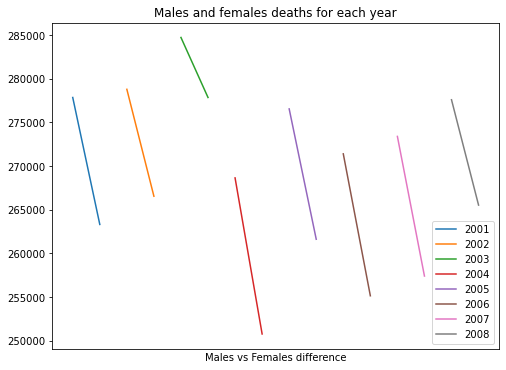

In [6]:
df_mask_all = df.ICD10=="All causes of death (A00-Y89) excluding S00-T98"
df_all = df[df_mask_all]

fig, ax = plt.subplots(figsize=(8,6))
for label, temp_df in df_all.groupby('TIME'):
    temp_df.Value.plot(x='SEX', ax=ax, label=label)
plt.legend()
plt.title("Males and females deaths for each year")
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)
plt.xlabel("Males vs Females difference")

plt.show()

Utworzenie ramki zawierającej wszystkie przyczyny śmierci bez ich podsumowania, następnie pokazanie średniej, wariancji oraz odchylenie standardowe dla liczby śmierci. W kolejnym kroku porzucamy zbędną tabelę czasu, a następnie grupujemy wg przyczyny śmierci i podajemy sumę dla kazdej z nich. Wybieramy 10 najwyzszysch wartości i prezentujemy na grafie ich sumę wszystkich śmierci na przestrzeni lat 2001-2008 niezaleznie od płci

Average deaths:  8113.742307692308
Variance:  273195099.927756
Standard deviation:  16528.61457980541


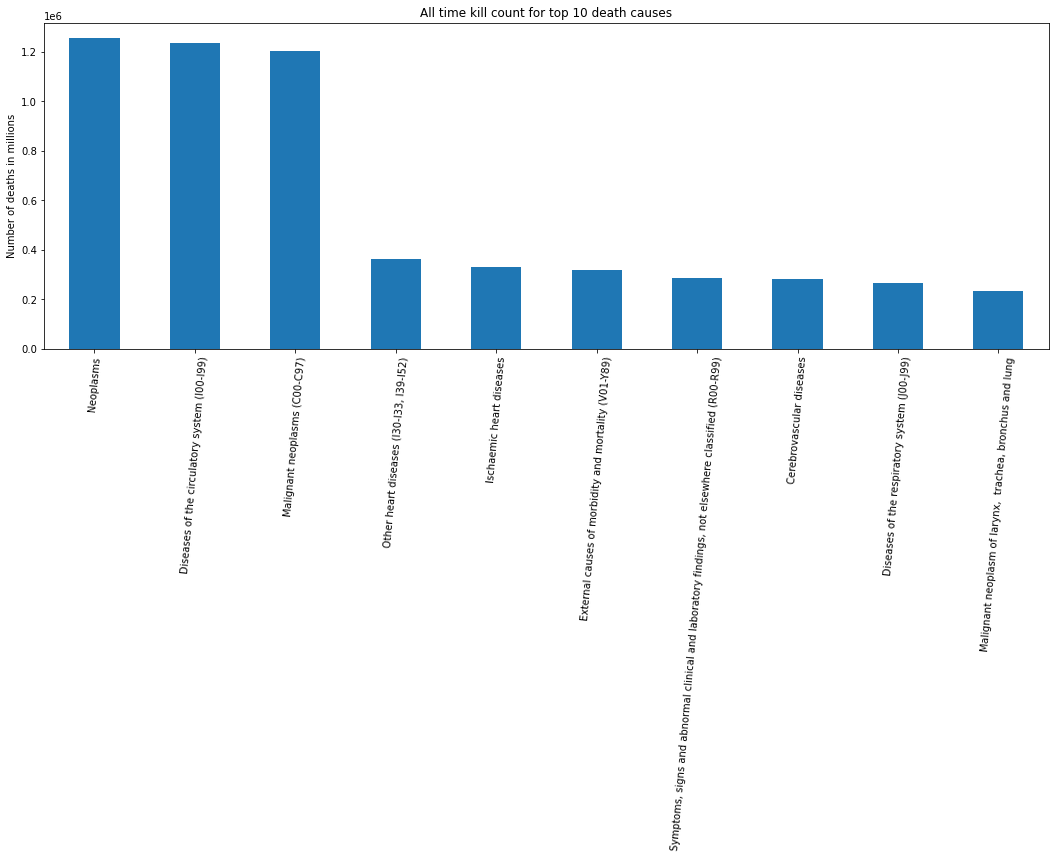

In [4]:
df_mask_ex_all = df.ICD10!="All causes of death (A00-Y89) excluding S00-T98"
df_ex_all = df[df_mask_ex_all]
print("Average deaths: ", df_ex_all.Value.mean())
print("Variance: ", df_ex_all.Value.var())
print("Standard deviation: ", df_ex_all.Value.std())
df_ex_all = df_ex_all.drop(columns=['TIME'])
gdf_ex_all = df_ex_all.groupby('ICD10').sum()
gdf_ex_all = gdf_ex_all.nlargest(10,'Value')
plt.rcParams['figure.figsize'] = [18, 6]
gdf_ex_all.plot(kind='bar', legend=None)
plt.title("All time kill count for top 10 death causes")
plt.ylabel("Number of deaths in millions")
plt.xlabel("")
plt.xticks(rotation=85)

plt.show()